# <center> Trabajo 1 - Seminario de Ciencia de Datos.
Nombre: Juan Licanqueo

Use los datos de data_latam_032023.csv que están en el siguiente repositorio de dropbox:

https://www.dropbox.com/sh/mdoa0wmf3ao526u/AABXInn2Co1XTTF_BKpREsC9a?dl=0.
    
Se solicita realizar los siguientes puntos:
1. Busque cargar la base de datos de forma directa desde el dropbox al jupyter notebook.
2. Cuente la cantidad de registros que contiene la base de datos y la cantidad de registros por empresas en Chile.
3. Tome un indicador o variable relevante y calcule la media también la desviación estándar. 
4. Seleccione un conjunto de empresas y realice una comparación utilizando una variable relevante, para esto ocupe el gráfico de boxplot y genere una visualización.
5. Del mismo conjunto de datos y de la variable relevante seleccionada generé un gráfico de densidades para realizar comparaciones entre las empresas.

### Importamos las librerías .

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os 

### Definimos el directorio de trabajo.

In [60]:
#Utilizamos la librerís OS para definir nuestro directorio de trabajo.
os.chdir('/Users/Juan/Desktop/Seminario_Ciencia_Datos')
#Verificamos si el directorio fue definido correctamente.
os.getcwd()

'C:\\Users\\Juan\\Desktop\\Seminario_Ciencia_Datos'

### Cargamos la base de datos directamente de dropbox.

In [62]:
#Generamos una variable para guardar el link donde esta ubicado la base de datos.
url = 'https://www.dropbox.com/sh/mdoa0wmf3ao526u/AACP03t0Q_D6yNeajQzhhjB9a/data_latam_032023.csv?dl=1'
#Creamos el data frame con pandas.
data = pd.read_csv(url)
#Visualizamos los 5 primeros registros.
data.head()

C:\Users\Juan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,nombre,tic_bolsa,tic,naic,year,quarter,date,Capex,Cash,ConsolNetInc,...,CurrLiab,DivPaid,MarketCapitaliz,NetIncome,PPENet,Revenues,StckhEq,TotalAssets,TotalLiability,pais
0,A.F.P. Capital S.A.,AFPCAPITAL<XSGO>,AFPCAPITAL,Insurance and Employee Benefit Funds,2021.0,12.0,122021.0,NaN,28832.104,73164.253,...,75496.876,70973.872,780941.8755,73164.253,8290.403,163319.880,414857.775,557327.570,NaN,Chile
1,A.F.P. Capital S.A.,AFPCAPITAL<XSGO>,AFPCAPITAL,Insurance and Employee Benefit Funds,2021.0,9.0,92021.0,NaN,67651.594,47593.581,...,47083.810,17973.846,780941.8755,47593.581,8867.496,120615.696,464280.280,576704.704,NaN,Chile
2,A.F.P. Capital S.A.,AFPCAPITAL<XSGO>,AFPCAPITAL,Insurance and Employee Benefit Funds,2021.0,6.0,62021.0,NaN,56806.206,31845.381,...,41566.808,17973.846,780941.8755,31845.381,9287.605,79872.727,448551.559,556012.126,NaN,Chile
3,A.F.P. Capital S.A.,AFPCAPITAL<XSGO>,AFPCAPITAL,Insurance and Employee Benefit Funds,2021.0,3.0,32021.0,NaN,34619.598,18921.993,...,62335.585,0.000,780941.8755,18921.993,9600.614,39917.322,435677.766,568099.668,NaN,Chile
4,A.F.P. Capital S.A.,AFPCAPITAL<XSGO>,AFPCAPITAL,Insurance and Employee Benefit Funds,2020.0,12.0,122020.0,NaN,66322.752,59912.751,...,122980.590,111143.647,780941.8755,59912.751,10265.233,149043.800,416763.980,611868.680,NaN,Chile


### Verificaremos como fueron cargados los tipos de variables.

In [63]:
#Utilizaremos el modulo info para ver cada tipo de variable que contine la base de datos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528948 entries, 0 to 528947
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   nombre           528948 non-null  object 
 1   tic_bolsa        528948 non-null  object 
 2   tic              528948 non-null  object 
 3   naic             528948 non-null  object 
 4   year             109872 non-null  float64
 5   quarter          109872 non-null  float64
 6   date             109872 non-null  float64
 7   Capex            68039 non-null   float64
 8   Cash             84685 non-null   float64
 9   ConsolNetInc     101075 non-null  float64
 10  CurrAssets       100905 non-null  float64
 11  CurrLiab         100932 non-null  float64
 12  DivPaid          69722 non-null   float64
 13  MarketCapitaliz  37918 non-null   float64
 14  NetIncome        104435 non-null  float64
 15  PPENet           102603 non-null  float64
 16  Revenues         98156 non-null   floa

### Realizaremos un conteo de todos los registros de la base de datos.

In [64]:
#Utilizaremos el atributo shape para extraer solo la cantidad de registros y la guardaremos
#en una variable.
Cant_Reg = data.shape[0]
#Con print visualizaremos la cantidad de registros guardados en la variable.
print('La cantidad de registro que contiene la base de datos es {}'.format(Cant_Reg))

La cantidad de registro que contiene la base de datos es 528948


### Realizaremos un conteo de la cantidad de empresas chilenas que hay en la base de datos.

In [97]:
#Obtendremos la cantidad de valores unicos filtrando la base de datos por país igual a Chile y 
#guardaremos el resultado en una variable.
Emp_Ch = list(data[data.pais == 'Chile'].loc[:,['nombre']].dropna().nunique())[0]
#Imprimiremos el resultado obtenido.
print('La cantidad de empresas chilenas que hay en la base de datos son {}'.format(Emp_Ch))

La cantidad de empresas chilenas que hay en la base de datos son 483


### Visualizaremos la cantidad de registro que hay por empresas en Chile.

C:\Users\Juan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Juan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0, flags=flags)


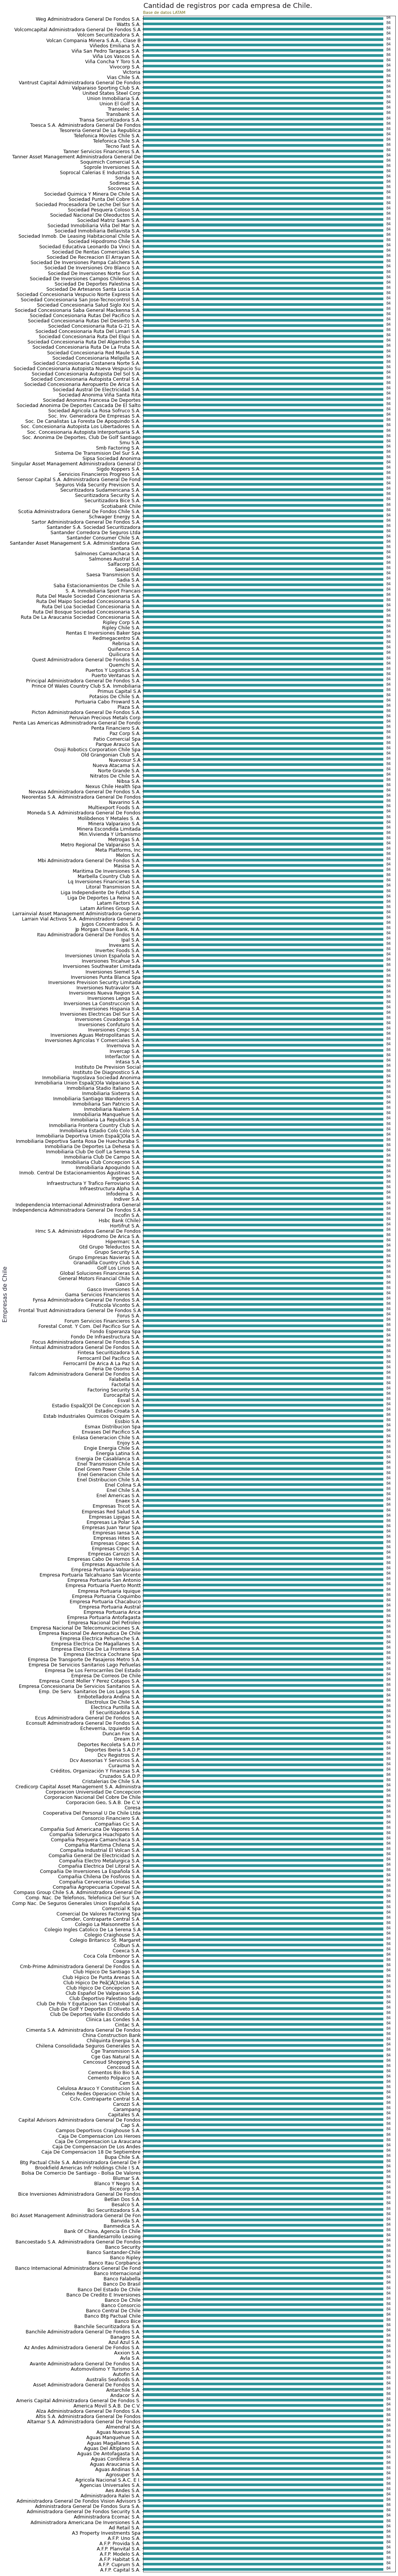

In [7]:
#Crearemos un gráfico de barras para la cantidad de registro de las empresas chilenas.
data[data.pais == 'Chile'].loc[:,['nombre']].dropna().groupby('nombre').nombre.agg('count').\
                                                                             plot(kind = 'barh',
                                                                                 figsize = (12,125),
                                                                                 legend = None,
                                                                                 color = '#2D9499')

#Dejaremos solo los nombres de las variables en el eje y, además daremos formato.
plt.xticks([])
plt.yticks(fontsize = 12.5)

#Colocaremos un título.
plt.suptitle('Cantidad de registros por cada empresa de Chile.',
            color = '#1C191C',
            fontsize = 18,
            ha = 'left',
            x = 0.126,
            y = 0.884)

#Colocaremos una descripción de la base de datos.
plt.title('Base de datos LATAM',
         color = '#70680F',
         fontsize = 10.5,
         loc = 'left')

#Generaremos un for para colocar la cantidad de datos en cada barra.
for i,v in enumerate(data[data.pais == 'Chile'].loc[:,['nombre']].dropna().groupby('nombre').nombre.agg('count')):
    plt.text(v+1,
            i,
            str(v),
            color = '#272738')
    
plt.show()

### De la gráfica de barras podemos inferir los siguiente:
 * #### La cantidad de registros que hay por empresas chilenas es de 84 para todas.
 * #### La cantidad de empresas chilenas que hay en la base de datos son 483.

### Calcularemos la media y la desviación estándar de Ingresos Neto a un conjunto de empresas de Chile.

In [65]:
#Filtraremos la base de datos por país Chile y agrupando por nombre de empresas, también 
#seleccionaremos la variable REVENUES (Ingresos Neto) y de esta crearemos las variables media y desviación estándar,
#además dejaremos los datos ordenados de mayor a menor.
Comparacion = data[data.pais == 'Chile'].groupby('nombre')['Revenues'].agg(['mean','std']).dropna().sort_values('mean', ascending = False)
#Resetearemos el índice para dejar el nombre como una varible libre.
Comparacion.reset_index(level = 0, inplace = True)
#Seleccionaremos los 18 registros mayores.
Comparacion_selec = Comparacion[0:18]
#Visualizaremos los registros obtenidos.
Comparacion_selec

,nombre,mean,std
0,Empresas Copec S.A.,5.762939e+06,4.532014e+06
1,Antarchile S.A.,5.761447e+06,4.533820e+06
2,Corporacion Nacional Del Cobre De Chile,4.847166e+06,3.062897e+06
3,Cencosud S.A.,4.551312e+06,3.121051e+06
4,Enel Americas S.A.,3.528602e+06,2.291975e+06
5,Empresa Nacional Del Petroleo,3.040402e+06,1.611385e+06
6,Falabella S.A.,3.012018e+06,2.438833e+06
7,Minera Escondida Limitada,2.566040e+06,1.109758e+06
8,Latam Airlines Group S.A.,2.230384e+06,1.917994e+06
9,Inversiones Cmpc S.A.,1.788839e+06,1.142897e+06


### De las variables calculadas  podemos inferir lo siguiente:
 * #### Se tomaron las primeras 18 empresas que más ingresos netos obtuvieron.
 * #### Las 2 primeras son muy similares tanto en su media como en la dispersión de sus datos.
 * #### Las 2 últimas también son similares por lo cual sus gráficas debieran ser parecidas.

### Filtraremos la base de datos con el listado de empresas chilenas anteriormente obtenidas, con todos los registros de la variable Ingresos Neto (REVENUE).

In [72]:
#Crearemos una variable para guardar el dataframe filtrado con los nombres de las empresas chilenas
#que más REVENUES (Ingresos Neto) tienen y traeremos todos sus registros.
Empresas_Comparar = data[data.nombre.isin(list(Comparacion_selec.nombre.unique()))].loc[:,['nombre','Revenues']]
#Visualizaremos el los datos filtrados.
Empresas_Comparar

,nombre,Revenues
1512,Agrosuper S.A.,3.401247e+06
1513,Agrosuper S.A.,2.347662e+06
1514,Agrosuper S.A.,1.429367e+06
1515,Agrosuper S.A.,7.079723e+05
1516,Agrosuper S.A.,2.594061e+06
...,...,...
37963,Sodimac S.A.,NaN
37964,Sodimac S.A.,NaN
37965,Sodimac S.A.,NaN
37966,Sodimac S.A.,NaN


### Crearemos un gráfico de boxplot para realizar una comparación de las empresas filtradas por sus Ingresos Netos.

<ipython-input-86-c10d417081eb>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  boxplot.set_title('Comparacion de las empresas de Chile por Ingresos Neto',
<ipython-input-86-c10d417081eb>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xticks(rotation = 75,


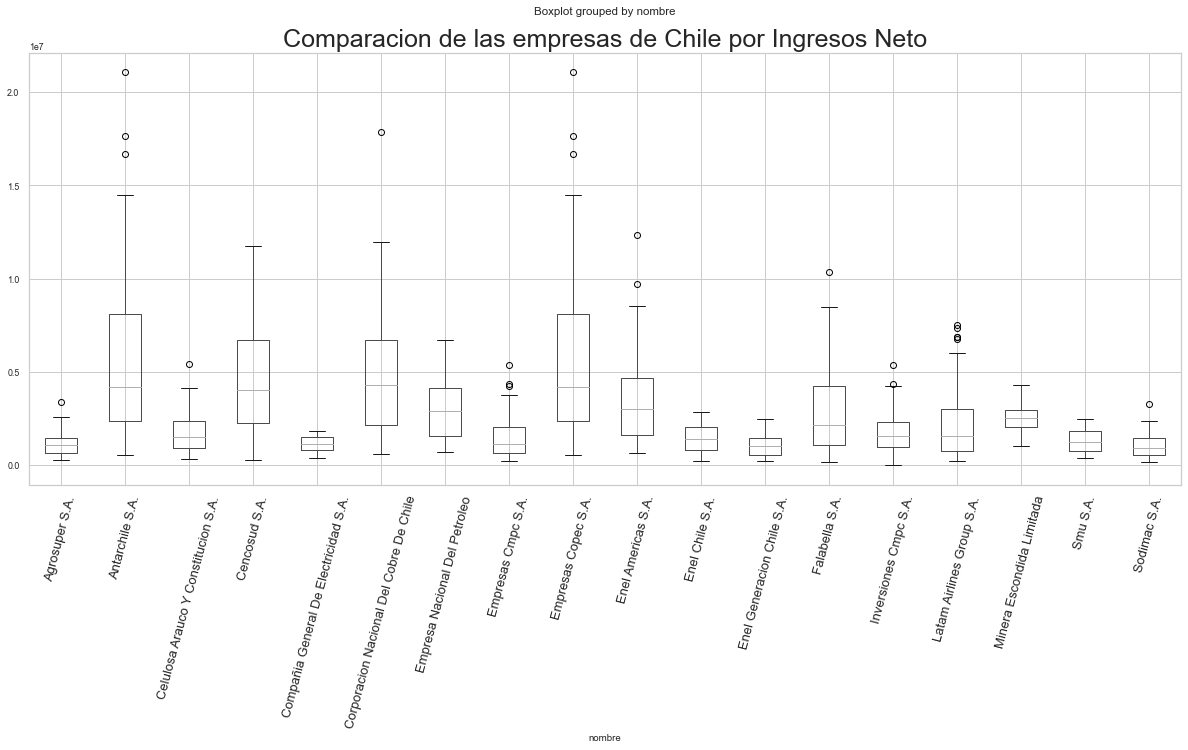

In [86]:
#Crearemos un boxplot por cada empresa tomando los datos de REVENUES (Ingresos Neto) para graficar.
boxplot = Empresas_Comparar.boxplot(column = 'Revenues', by = 'nombre', figsize = (20,8))
#Colocaremos un título a la gráfica.
boxplot.set_title('Comparacion de las empresas de Chile por Ingresos Neto',
            Fontsize = 25)
#Daremos una rotación a los nombres de las empresas para evitar traslapé.
plt.xticks(rotation = 75,
          Fontsize = 13)

plt.show()

### De las gráfica de boxplot podemos inferir lo siguiente:
 * #### Las empresas Copec y Antarchile sus gráficas son similares tal cual mostraba la tabla, y además son las que más ingresos muestran.
 * #### Las empresas Sodimac y Enel son similares pero es más dificil distinguir que son las que menos ingresos tienen ya que varios son parecidos en sus gráficas.

### Crearemos un set de gráfico de densidades de los mismos datos y realizaremos las comparaciones entre las empresas.

C:\Users\Juan\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


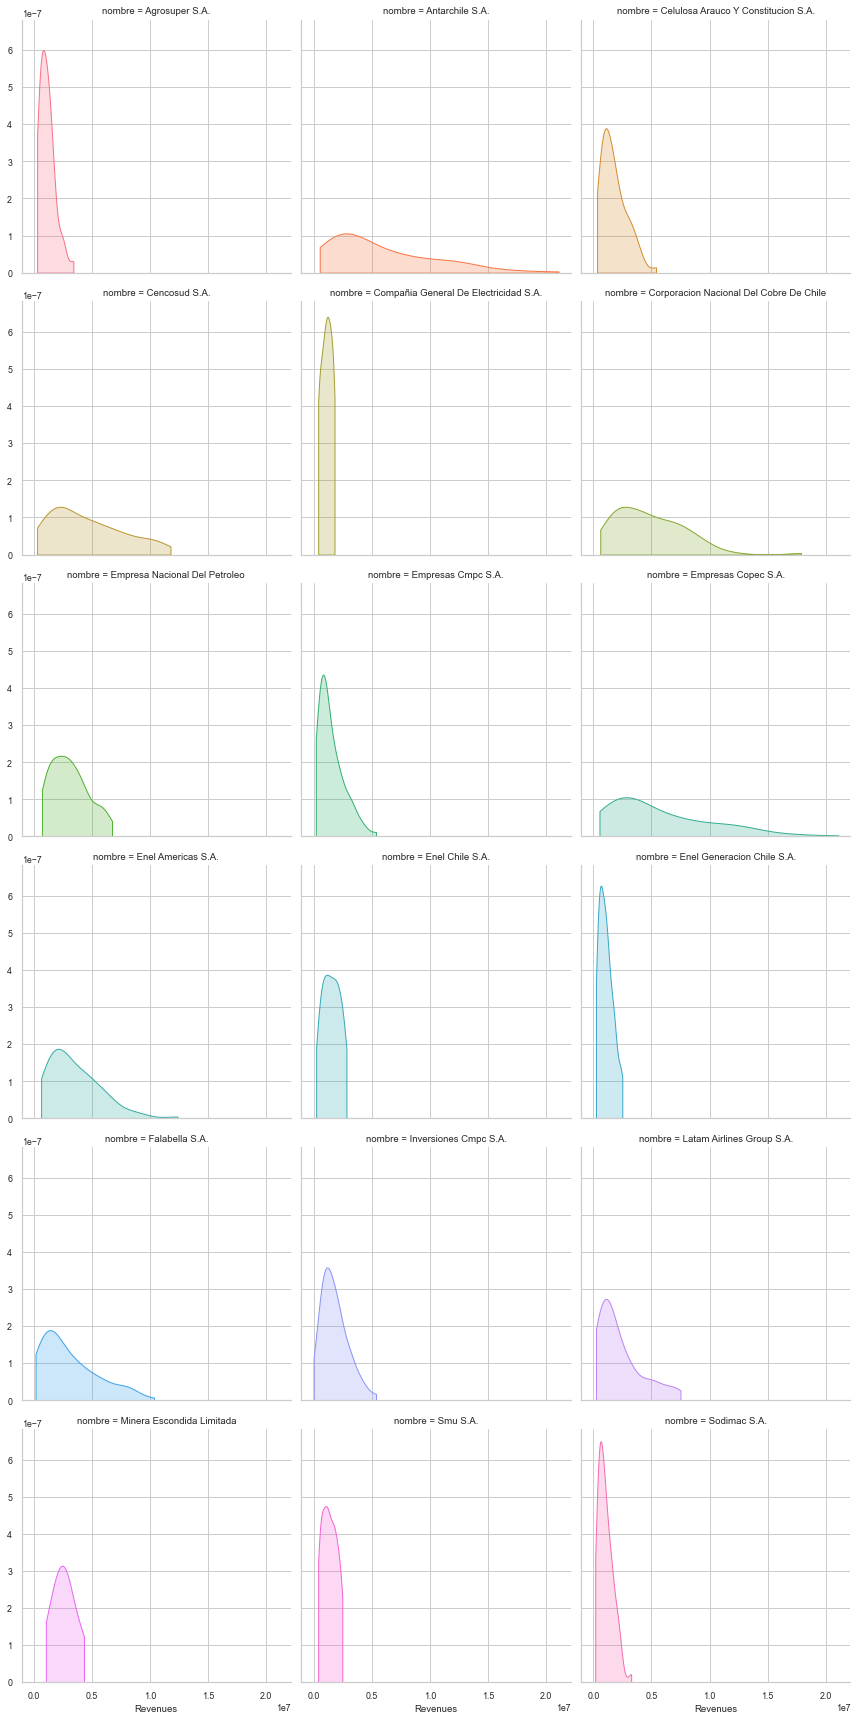

In [85]:
#Generaremos el marco donde serán insertados cada una de las gráficas.
sns.set(style = 'whitegrid', font_scale=0.8)
#Crearemos una variable donde ingresremos los datos y cuantas graficas queremos por fila y de que tamaño.
densidades = sns.FacetGrid(Empresas_Comparar, col = 'nombre', hue = 'nombre', col_wrap = 3, size=4)
#finalmente generaremos los gráficos de densidades entregando la variable relevante a comparar.
densidades = densidades.map(sns.kdeplot, 'Revenues', cut = 0, fill = True, common_norm = False, legend = False)

plt.show()

### De las gráficas de densidades podemos inferir lo siguiente:
 * #### Las empresas Copec y Antarchile sus gráficas son similares, podemos ver la distribución de sus ingresos se comporta de forma similar.
 * #### Las empresas entre menos ingresos perciben sus gráficas se van concentrando a la izquierda es así como Cencosud y Enel sus densidades son casi idénticas.